In [1]:
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm_notebook

Реализовать отрисовку графика в особой точке x = 0
Данные по оси ОX должны задаваться подмодулем numpy.linspace 

In [2]:

diag = []
for x in tqdm_notebook(np.linspace(-1.2, 1.2, 83028)):
    if x == 0:
        diag.append(1)
    else:
        diag.append((np.sin(x)/x)**2)

In [3]:
#diag = [i for i in diag if i > 0.5]

In [4]:
import os
import sys
import glob
import datetime

In [5]:
_ = "F:\\YandexDisk\\3.Programing\\"
PACK_DIR = _ + "myPacks\\"
PATTERN_DIR = _ + "work\\PulseViewer\\frame_of_AP\\patterns\\"
sys.path.append(PACK_DIR)
from PRAO import *

In [65]:
% time
head, main_pulse, data_pulses, back = read_profiles_MD('new_data/301017_0531+21_00_profiles.txt')

Wall time: 0 ns


In [66]:
non_cor_data = []
for pulse, backg in zip(data_pulses, back):
    non_cor_data.append(pulse + backg)

In [67]:
obser = np.hstack(non_cor_data)

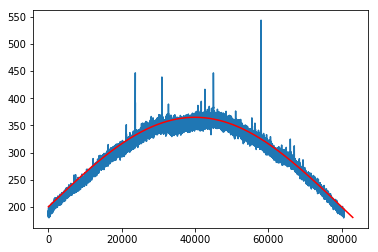

In [80]:
diag = []
for x in tqdm_notebook(np.linspace(-1.3, 1.4, len(obser) + int(head['numpointwin']))):
    if x == 0:
        diag.append(1)
    else:
        diag.append((np.sin(x)/x)**2)

plt.close()
plt.plot(obser)
plt.plot(np.array(diag)*365, color='r')
plt.show()

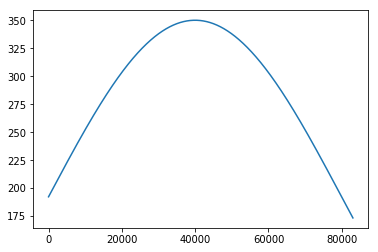

In [78]:
plt.close()
plt.plot(np.array(diag)*350)
plt.show()

In [47]:
len(obser)

80586

In [81]:
cor_d = []
for data_point, coeff in zip(obser, diag):
    cor_d.append(data_point/coeff)
cor_d = np.asarray(cor_d)

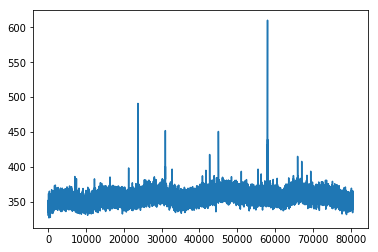

In [82]:
plt.close()
plt.plot(cor_d)
plt.show()

In [71]:
cor_d = cor_d.reshape(int(head['numpuls'])-1, int(head['numpointwin']))

### Вычет излучения туманности из данных

In [72]:
final_array = []
for pulse in cor_d:
    l_edge = np.median(pulse[:6])
    r_edge = np.median(pulse[-5:])
    array_coef = np.linspace(l_edge, r_edge, len(pulse))
    coef_pulse = []
    for point, cf in zip(pulse, array_coef):
        coef_pulse.append(point-cf)
    final_array.append(coef_pulse)
final_array = np.asarray(final_array)
flat_obser = np.hstack(final_array)

In [73]:
flat_obser_calib = flat_obser + 1720 # Калибровка в Янские(согласнго статье)

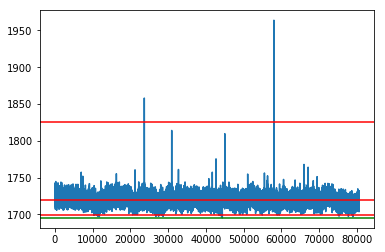

In [74]:
plt.close()
plt.plot(flat_obser_calib) #[24150:24300]
plt.axhline(np.median(flat_obser_calib), color='r')
plt.axhline(np.median(flat_obser_calib) + 15*np.std(flat_obser_calib), color='red')
plt.axhline(np.median(flat_obser_calib) - 3*np.std(flat_obser_calib), color='red')
plt.axhline(np.min(flat_obser_calib), color='green')
#plt.axhline(np.median(flat_obser_calib), color='r')
#plt.axhline(np.median(flat_obser_calib)*3, color='pink')
#plt.savefig('crab_observ_' + head['date'] + '.png', format='png', dpi=100)
plt.show()

In [83]:
thres = np.median(flat_obser_calib) + 15*np.std(flat_obser_calib)
giant_pulses = [[]]
i = 0
for point in flat_obser_calib:
    if point >= thres:
        giant_pulses[i].append(point)
    else:
        giant_pulses.append([])
        i +=1
giant_pulses = [i for i in giant_pulses if len(i)>0]

In [84]:
len(giant_pulses)

3

In [85]:
x_max = np.argmax(flat_obser_calib)

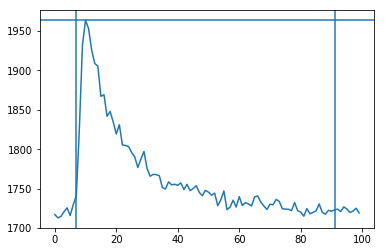

In [91]:
pulse = flat_obser_calib[x_max - 10: x_max + 90]
plt.close()
plt.plot(pulse)

plt.axhline(np.max(pulse))
#plt.axhline(0.5*np.max(pulse))
#plt.axhline(0.1*np.max(pulse))

plt.axvline(7)
plt.axvline(91)

plt.show()

In [92]:
width_of_pulse(pulse, 0.1)

(99.00000000000001, 0.0, 99.00000000000001)

In [40]:
np.argwhere(np.diff(np.sign(pulse - 0.1*np.max(pulse)))).flatten()

array([ 6, 68, 72, 73, 74, 75, 78, 79, 90, 91], dtype=int64)

In [33]:
np.max(flat_obser_calib[x_max - 10: x_max + 90])

1896.2453975614162

период пульсара: 0.0333924123
Количество импульсов в одном окне: 179.84881308320453
Количество точек на импульс(период): 13.57807125960983
Что сохраняем в картинках:
Полную запись импульсов с медианным, сигмой и 15\*сигмой


In [23]:
bins = np.linspace(np.min(flat_obser_calib), np.max(flat_obser_calib), 1000)

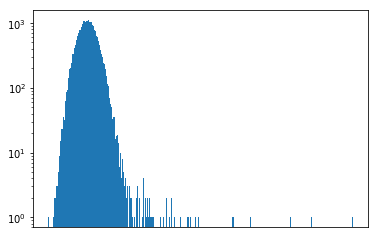

In [25]:
plt.close()
plt.hist(flat_obser_calib, bins)
plt.loglog(True)
plt.show()

Дата; Время старта; тау; период; Размер окна наблюдения (точки) Кол-во имп.; Кол-во ГИ; Амплитуда(ед. АЦП); Кол-во тчк на ГИ; Ширина на 50% (точки); Ширина на 10% (точки); Точка максимума; Медианное значение(ед. АЦП); СКО(ед. АЦП); адрес файла записи после обработки; адрес картинки после обработки; адрес файла распределения после обработки; адрес картинки распределения после обработки; Примечание